In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load dataset
file_path = '../data/featureddata/featured_daily.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Ensure date column is datetime type
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),ozone (μg/m³),pm2_5 (μg/m³)_subindex,pm10 (μg/m³)_subindex,carbon_monoxide (μg/m³)_subindex,...,year,month,day,weekday,AQI_lag_1,AQI_lag_7,AQI_lag_14,AQI_lag_30,AQI_7day_avg,AQI_30day_avg
0,2022-09-01,16.975595,11.324881,260.960714,14.001310,24.433571,27.367857,19,17,13,...,2022,9,1,3,NaN,NaN,NaN,NaN,31.000000,31.000000
1,2022-09-02,23.900833,14.851786,216.500000,15.180238,16.973690,49.507143,25,24,11,...,2022,9,2,4,31.0,NaN,NaN,NaN,40.500000,40.500000
2,2022-09-03,45.785000,29.625714,266.538095,21.304643,22.163333,82.386905,49,46,13,...,2022,9,3,5,50.0,NaN,NaN,NaN,54.333333,54.333333
3,2022-09-04,42.779048,28.211429,294.498810,21.417738,22.800397,92.986905,47,43,15,...,2022,9,4,6,82.0,NaN,NaN,NaN,64.000000,64.000000
4,2022-09-05,37.715714,24.764286,272.763095,21.513929,24.431746,86.973810,41,38,14,...,2022,9,5,0,93.0,NaN,NaN,NaN,68.600000,68.600000


In [3]:
### 1. Summary Statistics by Urban/Rural and Location
pollutants = ['pm10 (μg/m³)', 'pm2_5 (μg/m³)', 'carbon_monoxide (μg/m³)',
              'nitrogen_dioxide (μg/m³)', 'sulphur_dioxide (μg/m³)', 'ozone (μg/m³)']

# Group by Urban/Rural and Location
stats = df.groupby(['Urban/Rural', 'Location'])[pollutants].agg(['mean', 'median', 'std']).reset_index()
print("Summary Statistics by Urban/Rural and Location:")
print(stats.head())


Summary Statistics by Urban/Rural and Location:
  Urban/Rural    Location pm10 (μg/m³)                       pm2_5 (μg/m³)  \
                                  mean     median        std          mean   
0       Rural      Asawar    28.239145  21.979305  18.251626     19.545232   
1       Rural   Bhalukhop    28.239138  21.974608  18.251376     19.545229   
2       Rural   Koonimedu    33.415705  31.556071  14.845787     20.671513   
3       Rural  Mawlynnong    28.244260  21.996310  18.262778     19.548381   
4       Rural    Saputara    28.238958  21.968861  18.250666     19.545225   

                        carbon_monoxide (μg/m³)                         \
      median        std                    mean      median        std   
0  15.625667  12.363513              282.516519  276.472173  77.087136   
1  15.630297  12.363262              282.516461  276.487311  77.085203   
2  18.664464   9.699452              220.435379  212.873214  54.325153   
3  15.612798  12.371022            

In [4]:

# Save to CSV
stats.to_csv('../AnalysisOutputs/summary_statistics.csv', index=False)

In [5]:

### 2. Identify Pollution Spikes (Upper 95th percentile)
spike_thresholds = df[pollutants].quantile(0.95)
spikes = df[df[pollutants] > spike_thresholds].dropna()

print("Pollution Spikes Identified:")
print(spikes.head())

# Save spikes to CSV
spikes.to_csv('../AnalysisOutputs/pollution_spikes.csv', index=False)


Pollution Spikes Identified:
Empty DataFrame
Columns: [date, pm10 (μg/m³), pm2_5 (μg/m³), carbon_monoxide (μg/m³), nitrogen_dioxide (μg/m³), sulphur_dioxide (μg/m³), ozone (μg/m³), pm2_5 (μg/m³)_subindex, pm10 (μg/m³)_subindex, carbon_monoxide (μg/m³)_subindex, ozone (μg/m³)_subindex, sulphur_dioxide (μg/m³)_subindex, nitrogen_dioxide (μg/m³)_subindex, AQI, Location, Urban/Rural, year, month, day, weekday, AQI_lag_1, AQI_lag_7, AQI_lag_14, AQI_lag_30, AQI_7day_avg, AQI_30day_avg]
Index: []

[0 rows x 26 columns]


In [6]:
### 3. Pollutant Contribution to AQI
subindices = ['pm2_5 (μg/m³)_subindex', 'pm10 (μg/m³)_subindex', 'carbon_monoxide (μg/m³)_subindex',
              'ozone (μg/m³)_subindex', 'sulphur_dioxide (μg/m³)_subindex', 'nitrogen_dioxide (μg/m³)_subindex']

# Mean contribution of each pollutant to AQI
contributions = df.groupby('Urban/Rural')[subindices].mean()
contributions['Total'] = contributions.sum(axis=1)
contributions = (contributions.div(contributions['Total'], axis=0) * 100).drop('Total', axis=1)

print("Pollutant Contribution to AQI:")
print(contributions)

# Save to CSV
contributions.to_csv('../AnalysisOutputs/pollutant_contributions.csv')



Pollutant Contribution to AQI:
             pm2_5 (μg/m³)_subindex  pm10 (μg/m³)_subindex  \
Urban/Rural                                                  
Rural                     19.568973              17.383344   
Urban                     23.469565              19.533030   

             carbon_monoxide (μg/m³)_subindex  ozone (μg/m³)_subindex  \
Urban/Rural                                                             
Rural                                8.021945               49.436331   
Urban                                8.850301               35.118422   

             sulphur_dioxide (μg/m³)_subindex  \
Urban/Rural                                     
Rural                                2.526974   
Urban                                5.921601   

             nitrogen_dioxide (μg/m³)_subindex  
Urban/Rural                                     
Rural                                 3.062434  
Urban                                 7.107080  


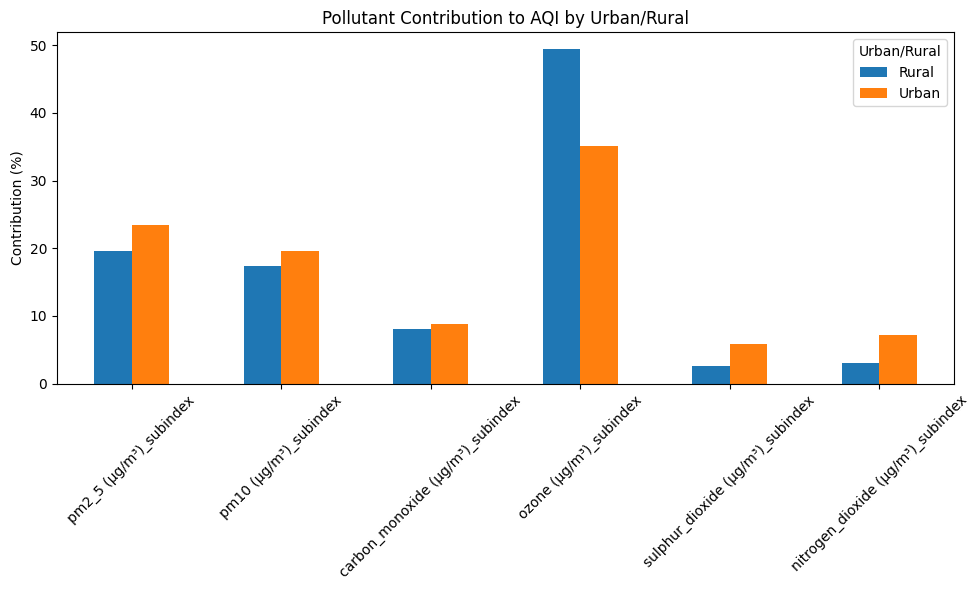

Correlation Matrix:
                          pm10 (μg/m³)  pm2_5 (μg/m³)  \
pm10 (μg/m³)                  1.000000       0.932692   
pm2_5 (μg/m³)                 0.932692       1.000000   
carbon_monoxide (μg/m³)       0.806130       0.879263   
nitrogen_dioxide (μg/m³)      0.747659       0.757943   
sulphur_dioxide (μg/m³)       0.759995       0.789987   
ozone (μg/m³)                 0.318178       0.331810   
AQI                           0.824774       0.877601   

                          carbon_monoxide (μg/m³)  nitrogen_dioxide (μg/m³)  \
pm10 (μg/m³)                             0.806130                  0.747659   
pm2_5 (μg/m³)                            0.879263                  0.757943   
carbon_monoxide (μg/m³)                  1.000000                  0.903607   
nitrogen_dioxide (μg/m³)                 0.903607                  1.000000   
sulphur_dioxide (μg/m³)                  0.877147                  0.959782   
ozone (μg/m³)                            0.047945

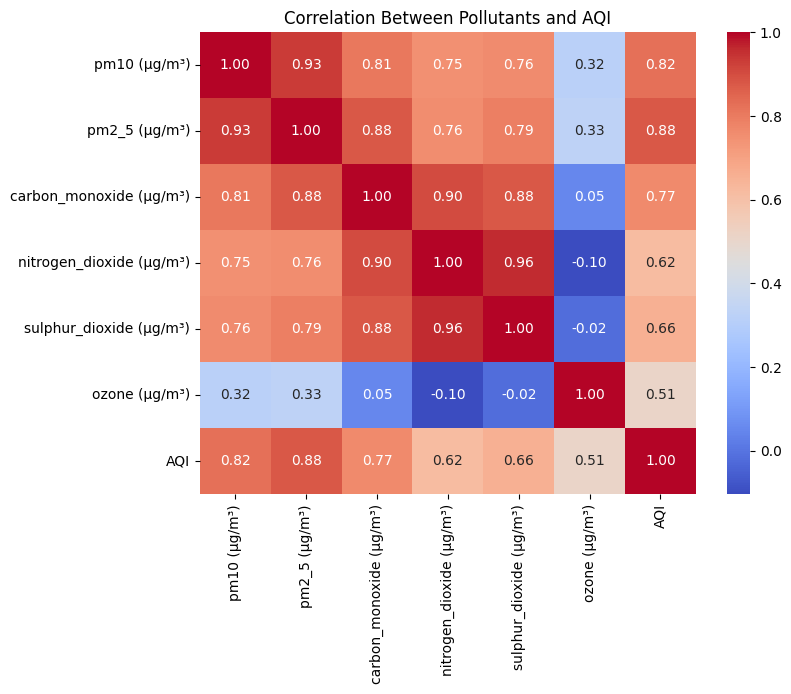

In [7]:

# Visualize Contribution
contributions.T.plot(kind='bar', figsize=(10, 6), title='Pollutant Contribution to AQI by Urban/Rural')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/pollutant_contributions.png')
plt.show()

### 4. Correlation Analysis Between Pollutants and AQI
corr_matrix = df[pollutants + ['AQI']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Save to CSV
corr_matrix.to_csv('../AnalysisOutputs/correlation_matrix.csv')

# Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.savefig('../plots/correlation_matrix.png')
plt.show()